In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Veri Seti Seçimi ve Yükleme

In [1]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd  # Veri analizi için
import numpy as np  # Sayısal hesaplamalar için

# Veri setini yükle
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

# Veri setinin ilk birkaç satırını görüntüle
print("Veri setinin ilk 5 satırı:")
print(data.head())

# Veri setindeki sütun adlarını görüntüle
print("\nVeri setindeki sütunlar:")
print(data.columns)

# Veri setindeki genel bilgi ve özet istatistikler
print("\nVeri seti hakkında genel bilgi:")
print(data.info())

Veri setinin ilk 5 satırı:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Veri setindeki sütunlar:
Index(['review', 'sentiment'], dtype='object')

Veri seti hakkında genel bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


# **2. Keşifsel Veri Analizi (EDA)**

Yaptığımız İşlem:
Veri setinin dağılımını analiz ettik.
Sentiment sütunundaki pozitif ve negatif yorumların dağılımını görselleştirdik.

**2.1. Sentiment Dağılımı:**


Sentiment dağılımı:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


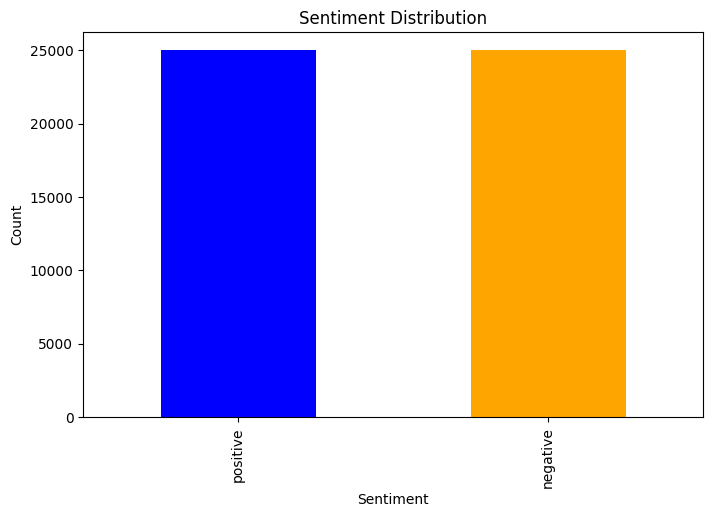

In [2]:
# Sentiment sütunundaki pozitif ve negatif değerlerin sayısını görüntüle
print("\nSentiment dağılımı:")
print(data['sentiment'].value_counts())

# Çubuk grafiği ile sentiment dağılımını görselleştir
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarla
data['sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Sentiment')  # X ekseni etiketi
plt.ylabel('Count')  # Y ekseni etiketi
plt.title('Sentiment Distribution')  # Başlık
plt.show()

**2.2. Sentiment Oranları:**


Sentiment oranları (%):
sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


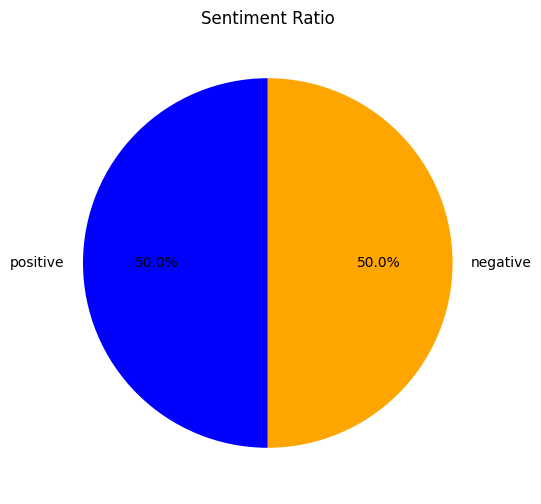

In [3]:
# Sentiment oranlarını hesapla
sentiment_ratio = data['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment oranları (%):")
print(sentiment_ratio)

# Pasta grafiği ile sentiment oranlarını görselleştir
plt.figure(figsize=(6, 6))
sentiment_ratio.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.ylabel('')
plt.title('Sentiment Ratio')
plt.show()

# **3. Veri Temizleme ve Ön İşleme**

In [4]:
# Veri setinde eksik verileri kontrol et
print(data.isnull().sum())  # Eksik verilerin sayısını göster

# Eksik verileri 'No Review' ile doldurmak için
data['review'] = data['review'].fillna('No Review')

review       0
sentiment    0
dtype: int64


Eksik verileri analiz ettik ve temizledik.

# **4. İstatistiksel Analiz**

**4.1. ANOVA Testi:**

In [5]:
from scipy.stats import f_oneway

# Yorum uzunluğunu hesaplayan yeni bir sütun ekle
data['review_length'] = data['review'].apply(len)

# Pozitif ve negatif yorum uzunluklarını gruplandır
positive_reviews = data[data['sentiment'] == 'positive']['review_length']
negative_reviews = data[data['sentiment'] == 'negative']['review_length']

# ANOVA testi uygula
f_statistic, p_value = f_oneway(positive_reviews, negative_reviews)

# Sonuçları yazdır
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 12.055723047739324
P-value: 0.0005167722620215148


**4.2. Chi-Squared Testi:**

In [6]:
from scipy.stats import chi2_contingency

# Kategorik değişkenler arasındaki çapraz tabloyu oluştur
contingency_table = pd.crosstab(data['sentiment'], data['review_length'] > data['review_length'].mean())

# Chi-squared testi uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Sonuçları yazdır
print(f"Chi-squared Değeri: {chi2}")
print(f"P-değeri: {p}")
print(f"Serbestlik Derecesi (Degrees of Freedom): {dof}")
print(f"Beklenen Değerler:\n{expected}")

Chi-squared Değeri: 2.453694791191249
P-değeri: 0.11724859315670287
Serbestlik Derecesi (Degrees of Freedom): 1
Beklenen Değerler:
[[16690.  8310.]
 [16690.  8310.]]


**Yaptığımız İşlem:**

1. Sayısal veriler eksik olduğu için review sütunundan bir sayısal özellik çıkardık (review_length).
2. Pozitif ve negatif yorumların uzunluklarını karşılaştırmak için ANOVA testi uyguladık.
3. Kategorik veriler arasındaki ilişkiyi incelemek için Chi-Squared testi yaptık.


# 5. Görselleştirme

**5.1 Histogram**

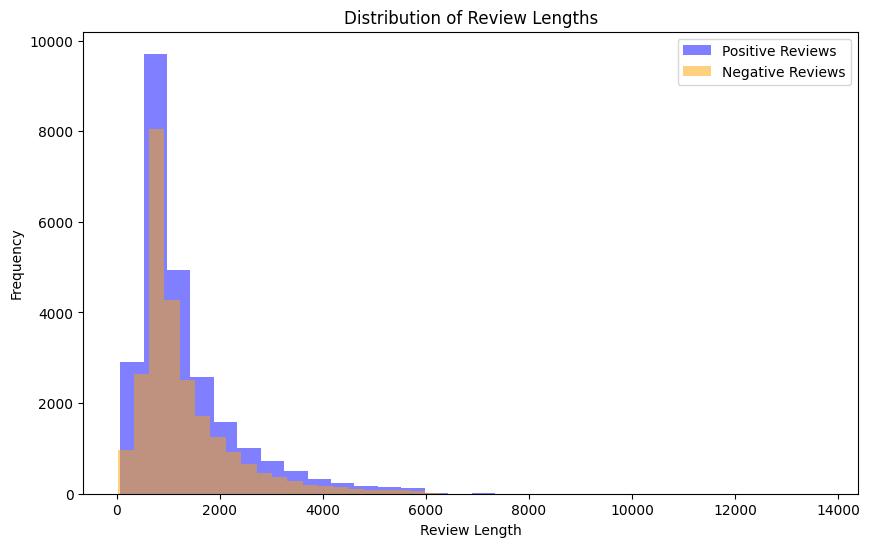

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(positive_reviews, bins=30, alpha=0.5, label='Positive Reviews', color='blue')
plt.hist(negative_reviews, bins=30, alpha=0.5, label='Negative Reviews', color='orange')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.legend()
plt.show()

**5.2. Kutu Grafiği (Boxplot):**

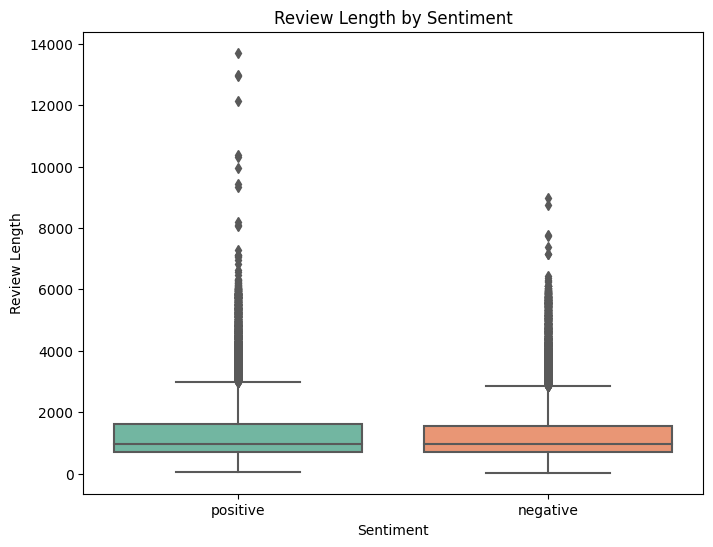

In [8]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='review_length', data=data, palette='Set2')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.title('Review Length by Sentiment')
plt.show()